In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from datetime import datetime


In [33]:
apple = pd.read_csv("AAPL.csv")
amazon = pd.read_csv("AMZN.csv")
meta = pd.read_csv("META.csv")

In [34]:
datetime_object = datetime.strptime("2019-01-02", '%Y-%m-%d')
frequency_encoding_dict = {'daily':'D', 'weekly':'W', 'monthly':'M'}
date_lst = (pd.date_range(start=datetime_object, periods=len(apple), \
        freq="D"))


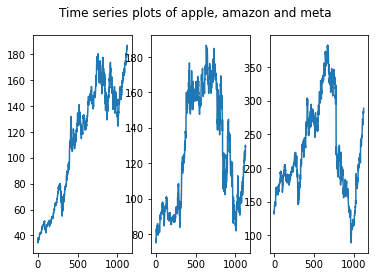

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle('Time series plots of apple, amazon and meta')
ax1.plot(apple['adj close'])
ax2.plot(amazon['adj close'])
ax3.plot(meta['adj close'])

In [36]:

df_apple = pd.DataFrame({'ds': date_lst, 'y': apple['adj close']})
df_apple.index = df_apple['ds']
model = Prophet(seasonality_mode= "multiplicative", daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model.fit(df_apple.iloc[0:1115])
future = model.make_future_dataframe(periods=12)
forecast = model.predict(future)
forecast['y'] = 0
forecast['y'].iloc[-12:] = df_apple['y'][-12:]
forecast[['y', 'yhat', 'yhat_lower', 'yhat_upper']][-12:].to_csv("apple_validation.csv")

11:48:18 - cmdstanpy - INFO - Chain [1] start processing
11:48:20 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\aniis\AppData\Local\Temp\ipykernel_28616\2937228333.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['y'].iloc[-12:] = df_apple['y'][-12:]


In [37]:
df_meta = pd.DataFrame({'ds': date_lst, 'y': meta['adj close']})
df_meta.index = df_meta['ds']
model = Prophet(seasonality_mode= "multiplicative", daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model.fit(df_meta.iloc[0:1115])
future = model.make_future_dataframe(periods=12)
forecast = model.predict(future)
forecast['y'] = 0
forecast['y'].iloc[-12:] = df_meta['y'][-12:]
forecast[['y', 'yhat', 'yhat_lower', 'yhat_upper']][-12:].to_csv("meta_validation.csv")

11:48:21 - cmdstanpy - INFO - Chain [1] start processing
11:48:23 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\aniis\AppData\Local\Temp\ipykernel_28616\1363014260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['y'].iloc[-12:] = df_meta['y'][-12:]


In [38]:
df_amzn = pd.DataFrame({'ds': date_lst, 'y': amazon['adj close']})
df_amzn.index = df_amzn['ds']
model = Prophet(seasonality_mode= "multiplicative", daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model.fit(df_amzn.iloc[0:1115])
future = model.make_future_dataframe(periods=12)
forecast = model.predict(future)
forecast['y'] = 0
forecast['y'].iloc[-12:] = df_amzn['y'][-12:]
forecast[['y', 'yhat', 'yhat_lower', 'yhat_upper']][-12:].to_csv("amazon_validation.csv")

11:48:24 - cmdstanpy - INFO - Chain [1] start processing
11:48:26 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\aniis\AppData\Local\Temp\ipykernel_28616\3301898016.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['y'].iloc[-12:] = df_amzn['y'][-12:]


In [39]:
len(apple)

1127